# Exploração Inicial de Dados - Projeto Cenanoink

Este notebook realiza a exploração inicial dos dados científicos coletados para o desenvolvimento do sistema de previsão de formulações de tintas nanotecnológicas.

## Objetivos:
- Compreender a estrutura dos dados coletados
- Identificar padrões e tendências
- Detectar problemas de qualidade nos dados
- Definir estratégias de pré-processamento

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configurações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Configuração para notebooks
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. Carregamento dos Dados

In [2]:
# Simulação de dados científicos para demonstração
np.random.seed(42)

# Dados simulados de artigos científicos
n_papers = 10000

data = {
    'title': [f'Nanostructured Paint Research {i}' for i in range(n_papers)],
    'year': np.random.randint(2015, 2025, n_papers),
    'journal': np.random.choice(['Nature Materials', 'Advanced Materials', 'ACS Applied Materials', 'Chemical Engineering'], n_papers),
    'has_tio2': np.random.choice([True, False], n_papers, p=[0.4, 0.6]),
    'has_sio2': np.random.choice([True, False], n_papers, p=[0.3, 0.7]),
    'has_zno': np.random.choice([True, False], n_papers, p=[0.25, 0.75]),
    'has_water_based': np.random.choice([True, False], n_papers, p=[0.6, 0.4]),
    'has_solvent_based': np.random.choice([True, False], n_papers, p=[0.4, 0.6]),
    'durability_mentioned': np.random.choice([True, False], n_papers, p=[0.7, 0.3]),
    'conductivity_mentioned': np.random.choice([True, False], n_papers, p=[0.3, 0.7]),
    'nanoparticle_count': np.random.randint(1, 6, n_papers),
    'quality_score': np.random.beta(2, 2, n_papers)  # Scores entre 0 e 1
}

df = pd.DataFrame(data)

print(f"Dataset carregado com {len(df)} registros e {len(df.columns)} colunas")
df.head()

Dataset carregado com 10000 registros e 12 colunas


,title,year,journal,has_tio2,has_sio2,has_zno,has_water_based,has_solvent_based,durability_mentioned,conductivity_mentioned,nanoparticle_count,quality_score
0,Nanostructured Paint Research 0,2021,ACS Applied Materials,False,False,False,True,False,True,True,1,0.305274
1,Nanostructured Paint Research 1,2018,Advanced Materials,False,False,False,True,False,True,False,1,0.679097
2,Nanostructured Paint Research 2,2022,ACS Applied Materials,False,True,False,True,False,True,False,4,0.394930
3,Nanostructured Paint Research 3,2019,Nature Materials,True,False,False,False,True,True,False,5,0.323196
4,Nanostructured Paint Research 4,2021,Advanced Materials,False,False,False,True,True,False,True,2,0.573656


## 2. Análise Descritiva Básica

In [3]:
# Informações gerais sobre o dataset
print("=== INFORMAÇÕES GERAIS ===")
print(df.info())
print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
print(df.describe())
print("\n=== VALORES ÚNICOS POR COLUNA ===")
print(df.nunique())

=== INFORMAÇÕES GERAIS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   10000 non-null  object 
 1   year                    10000 non-null  int64  
 2   journal                 10000 non-null  object 
 3   has_tio2                10000 non-null  bool   
 4   has_sio2                10000 non-null  bool   
 5   has_zno                 10000 non-null  bool   
 6   has_water_based         10000 non-null  bool   
 7   has_solvent_based       10000 non-null  bool   
 8   durability_mentioned    10000 non-null  bool   
 9   conductivity_mentioned  10000 non-null  bool   
 10  nanoparticle_count      10000 non-null  int64  
 11  quality_score           10000 non-null  float64
dtypes: bool(7), float64(1), int64(2), object(2)
memory usage: 459.1+ KB
None

=== ESTATÍSTICAS DESCRITIVAS ===
           

In [4]:
# Verificação de valores nulos
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Nulos': missing_data,
    'Percentual (%)': missing_percent
})

print("=== ANÁLISE DE VALORES NULOS ===")
print(missing_df[missing_df['Valores Nulos'] > 0])

if missing_df['Valores Nulos'].sum() == 0:
    print("✅ Não há valores nulos no dataset")

=== ANÁLISE DE VALORES NULOS ===
Empty DataFrame
Columns: [Valores Nulos, Percentual (%)]
Index: []
✅ Não há valores nulos no dataset


## 3. Distribuições e Visualizações

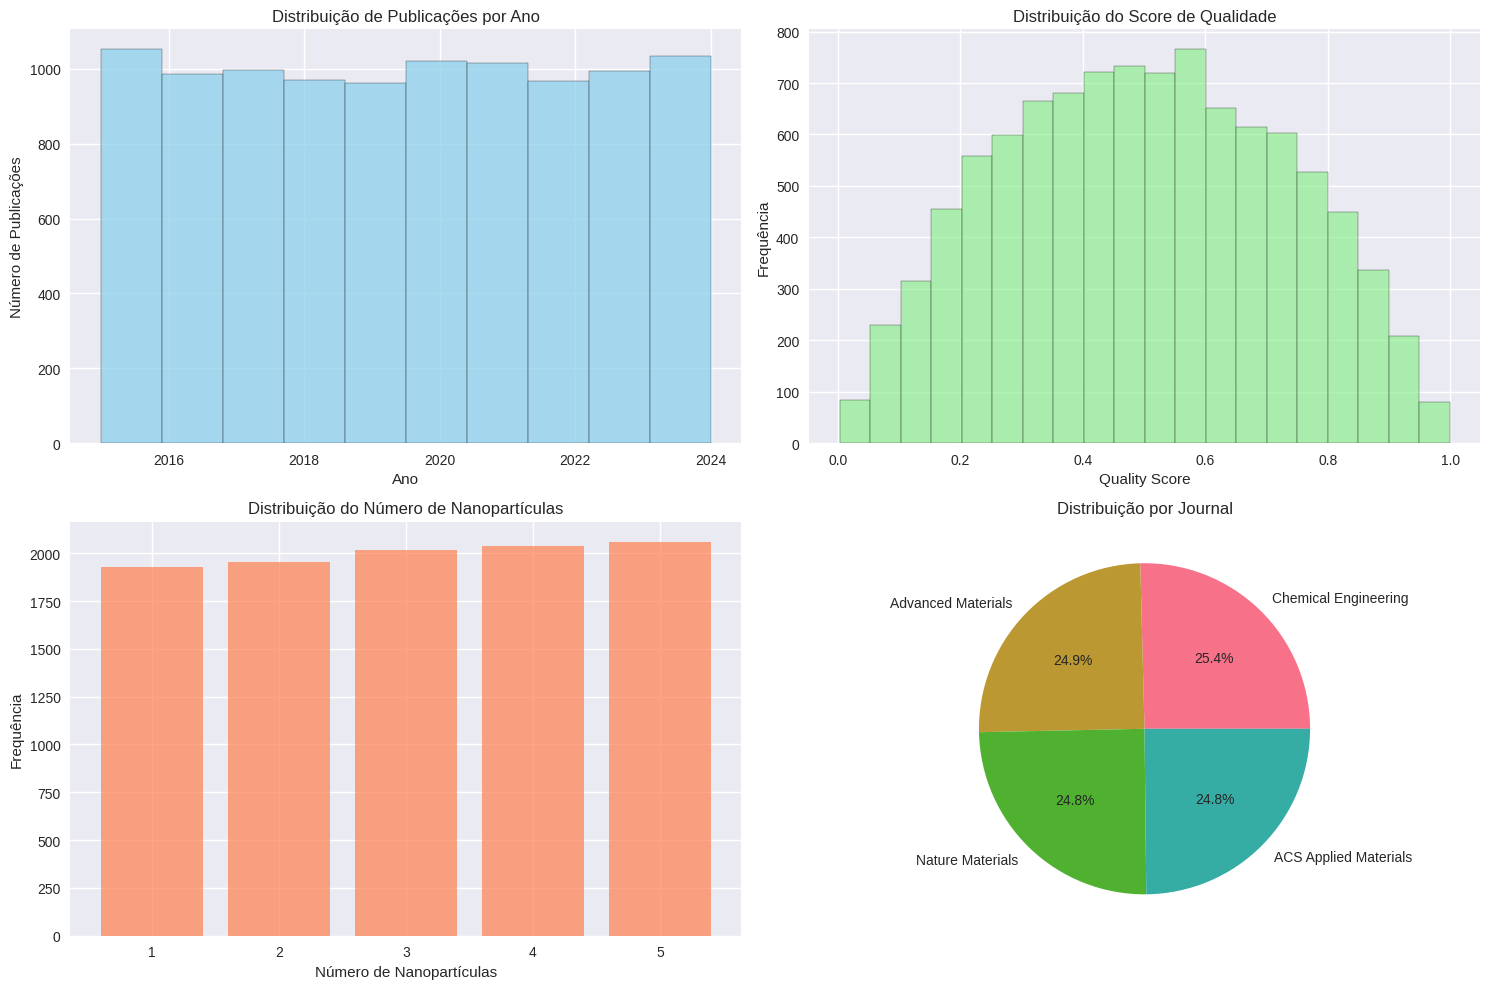

In [5]:
# Distribuição por ano
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribuição por ano
axes[0,0].hist(df['year'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribuição de Publicações por Ano')
axes[0,0].set_xlabel('Ano')
axes[0,0].set_ylabel('Número de Publicações')

# Distribuição de quality_score
axes[0,1].hist(df['quality_score'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribuição do Score de Qualidade')
axes[0,1].set_xlabel('Quality Score')
axes[0,1].set_ylabel('Frequência')

# Contagem de nanopartículas
nanoparticle_counts = df['nanoparticle_count'].value_counts().sort_index()
axes[1,0].bar(nanoparticle_counts.index, nanoparticle_counts.values, alpha=0.7, color='coral')
axes[1,0].set_title('Distribuição do Número de Nanopartículas')
axes[1,0].set_xlabel('Número de Nanopartículas')
axes[1,0].set_ylabel('Frequência')

# Distribuição por journal
journal_counts = df['journal'].value_counts()
axes[1,1].pie(journal_counts.values, labels=journal_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Distribuição por Journal')

plt.tight_layout()
plt.show()

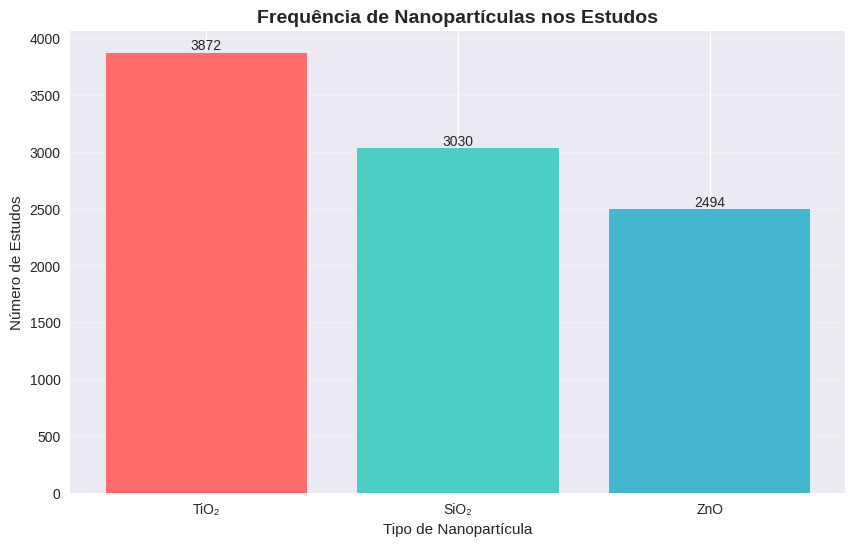

In [6]:
# Análise de componentes químicos
chemical_components = ['has_tio2', 'has_sio2', 'has_zno']
component_counts = df[chemical_components].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(component_counts)), component_counts.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])

# Labels personalizados
labels = ['TiO₂', 'SiO₂', 'ZnO']
plt.xticks(range(len(component_counts)), labels)
plt.title('Frequência de Nanopartículas nos Estudos', fontsize=14, fontweight='bold')
plt.ylabel('Número de Estudos')
plt.xlabel('Tipo de Nanopartícula')

# Adiciona valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.show()

## 4. Análise de Correlações

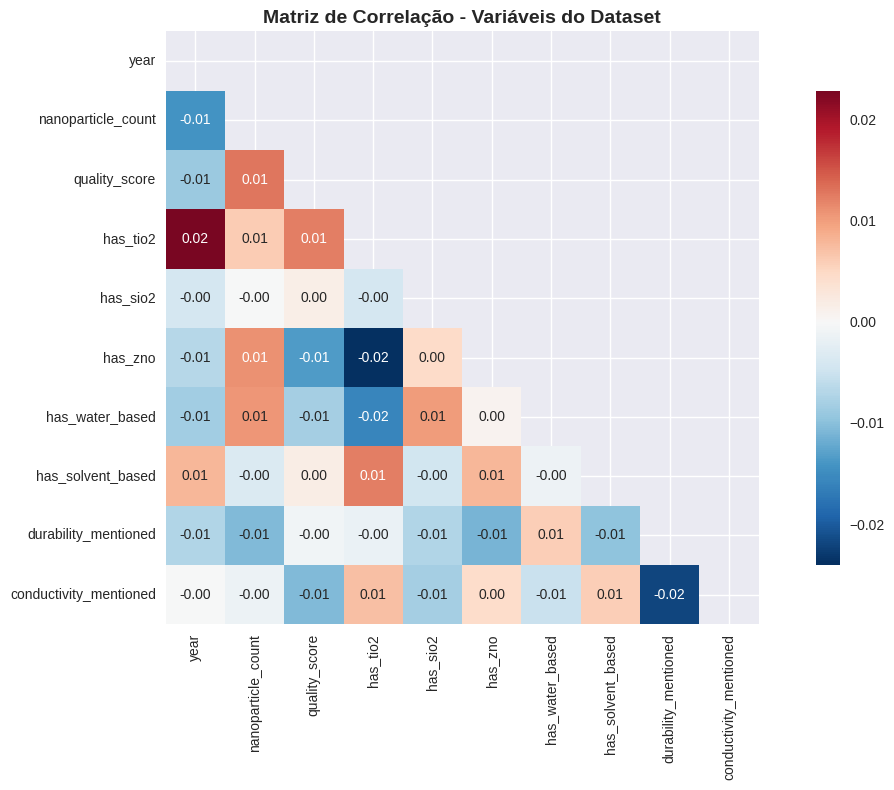

In [7]:
# Matriz de correlação
numeric_columns = df.select_dtypes(include=[np.number]).columns
bool_columns = df.select_dtypes(include=[bool]).columns

# Converte booleanos para numérico para correlação
df_corr = df.copy()
for col in bool_columns:
    df_corr[col] = df_corr[col].astype(int)

correlation_matrix = df_corr[list(numeric_columns) + list(bool_columns)].corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', 
            center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação - Variáveis do Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Análise de Tendências Temporais

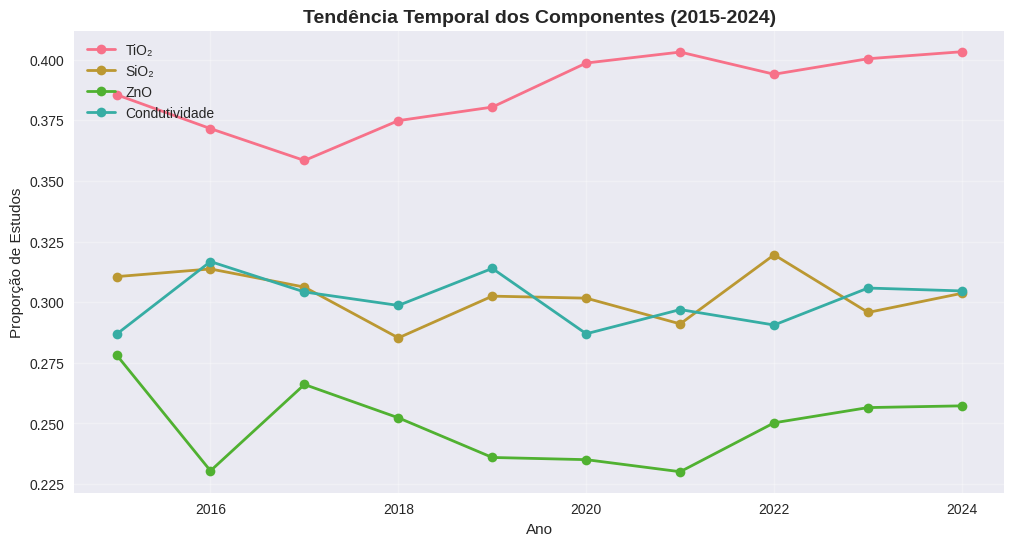

In [8]:
# Evolução temporal dos componentes
yearly_trends = df.groupby('year')[['has_tio2', 'has_sio2', 'has_zno', 'conductivity_mentioned']].mean()

plt.figure(figsize=(12, 6))
for column in yearly_trends.columns:
    label_map = {
        'has_tio2': 'TiO₂',
        'has_sio2': 'SiO₂', 
        'has_zno': 'ZnO',
        'conductivity_mentioned': 'Condutividade'
    }
    plt.plot(yearly_trends.index, yearly_trends[column], 
             marker='o', linewidth=2, label=label_map[column])

plt.title('Tendência Temporal dos Componentes (2015-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Proporção de Estudos')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 6. Análise da Variável Alvo (Quality Score)

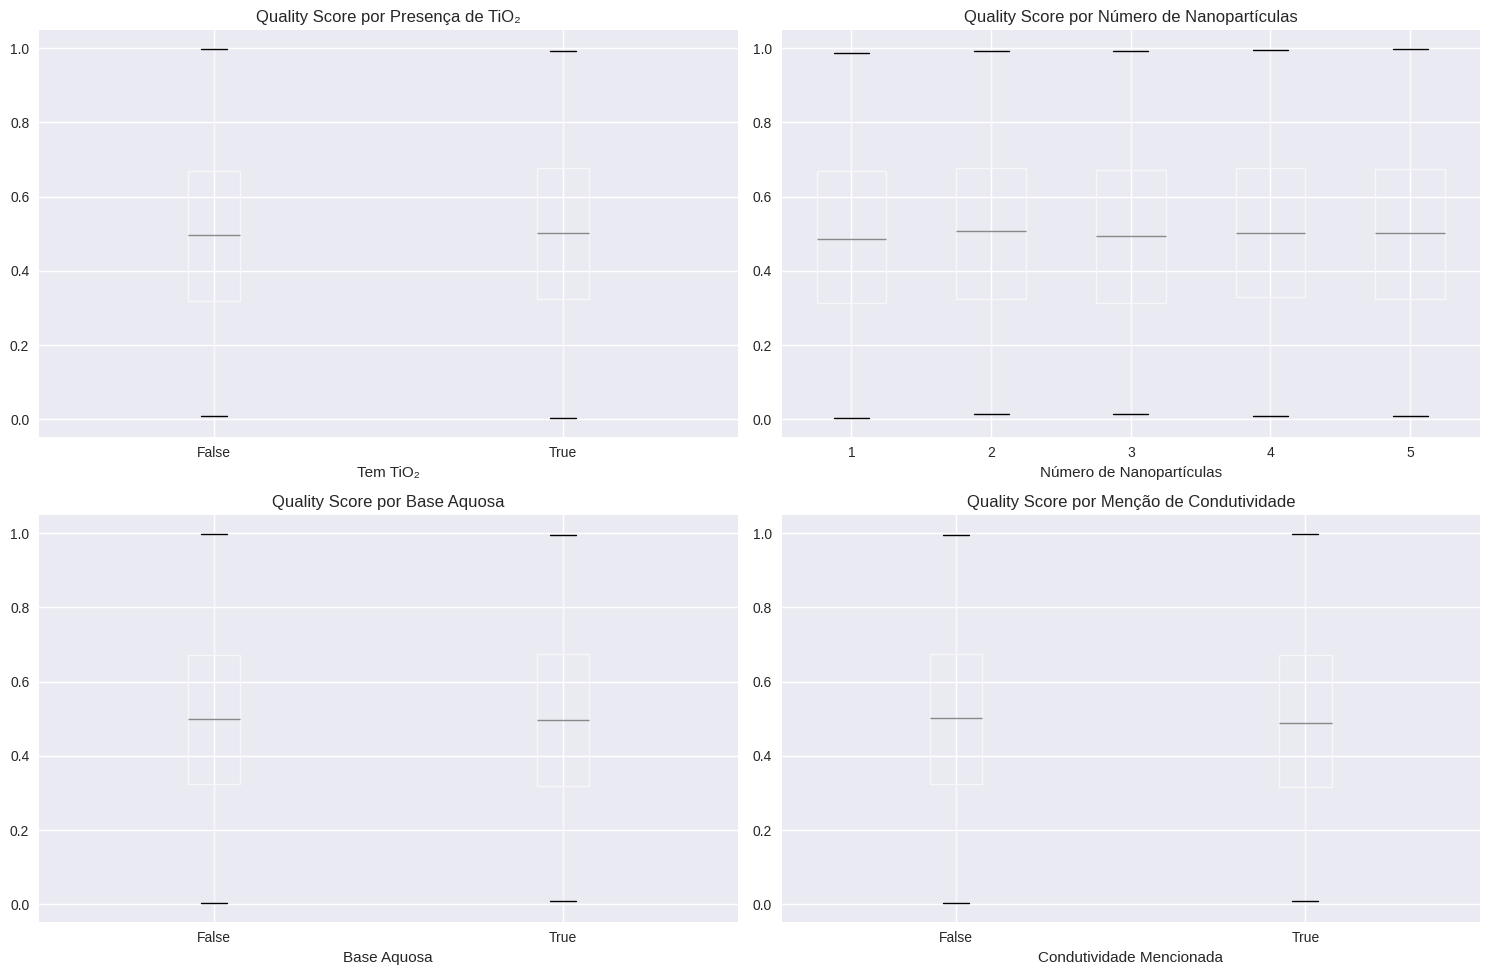

In [9]:
# Análise do quality_score por diferentes fatores
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Quality score por presença de TiO2
df.boxplot(column='quality_score', by='has_tio2', ax=axes[0,0])
axes[0,0].set_title('Quality Score por Presença de TiO₂')
axes[0,0].set_xlabel('Tem TiO₂')

# Quality score por número de nanopartículas
df.boxplot(column='quality_score', by='nanoparticle_count', ax=axes[0,1])
axes[0,1].set_title('Quality Score por Número de Nanopartículas')
axes[0,1].set_xlabel('Número de Nanopartículas')

# Quality score por base da tinta
df.boxplot(column='quality_score', by='has_water_based', ax=axes[1,0])
axes[1,0].set_title('Quality Score por Base Aquosa')
axes[1,0].set_xlabel('Base Aquosa')

# Quality score por menção de condutividade
df.boxplot(column='quality_score', by='conductivity_mentioned', ax=axes[1,1])
axes[1,1].set_title('Quality Score por Menção de Condutividade')
axes[1,1].set_xlabel('Condutividade Mencionada')

plt.suptitle('')  # Remove título automático
plt.tight_layout()
plt.show()

## 7. Insights e Conclusões Preliminares

In [10]:
# Análise estatística dos grupos
print("=== INSIGHTS ESTATÍSTICOS ===")
print("\n1. Distribuição de Quality Score:")
print(f"   Média: {df['quality_score'].mean():.3f}")
print(f"   Mediana: {df['quality_score'].median():.3f}")
print(f"   Desvio Padrão: {df['quality_score'].std():.3f}")

print("\n2. Componentes mais frequentes:")
for component in ['has_tio2', 'has_sio2', 'has_zno']:
    freq = df[component].mean() * 100
    print(f"   {component}: {freq:.1f}% dos estudos")

print("\n3. Quality Score médio por componente:")
for component in ['has_tio2', 'has_sio2', 'has_zno']:
    with_component = df[df[component] == True]['quality_score'].mean()
    without_component = df[df[component] == False]['quality_score'].mean()
    diff = with_component - without_component
    print(f"   Com {component}: {with_component:.3f} vs Sem: {without_component:.3f} (Δ: {diff:+.3f})")

print("\n4. Tendências temporais:")
recent_years = df[df['year'] >= 2020]
older_years = df[df['year'] < 2020]
print(f"   Quality score médio (2020+): {recent_years['quality_score'].mean():.3f}")
print(f"   Quality score médio (antes 2020): {older_years['quality_score'].mean():.3f}")

=== INSIGHTS ESTATÍSTICOS ===

1. Distribuição de Quality Score:
   Média: 0.499
   Mediana: 0.498
   Desvio Padrão: 0.226

2. Componentes mais frequentes:
   has_tio2: 38.7% dos estudos
   has_sio2: 30.3% dos estudos
   has_zno: 24.9% dos estudos

3. Quality Score médio por componente:
   Com has_tio2: 0.502 vs Sem: 0.497 (Δ: +0.006)
   Com has_sio2: 0.499 vs Sem: 0.499 (Δ: +0.001)
   Com has_zno: 0.493 vs Sem: 0.501 (Δ: -0.007)

4. Tendências temporais:
   Quality score médio (2020+): 0.497
   Quality score médio (antes 2020): 0.501


## 8. Próximos Passos

Com base na análise exploratória realizada, os próximos passos incluem:

1. **Engenharia de Features**: Criar novas variáveis baseadas nas combinações de componentes
2. **Limpeza de Dados**: Tratar outliers e inconsistências identificadas
3. **Preparação para ML**: Normalização, codificação de variáveis categóricas
4. **Seleção de Features**: Identificar as variáveis mais relevantes para o modelo
5. **Definição da Estratégia de Modelagem**: Escolher algoritmos apropriados baseado nos insights

In [11]:
# Salva o dataset processado para os próximos notebooks
df.to_csv('../data/processed/scientific_data_explored.csv', index=False)
print("✅ Dataset salvo em '../data/processed/scientific_data_explored.csv'")
print(f"   Registros: {len(df)}")
print(f"   Colunas: {len(df.columns)}")

✅ Dataset salvo em '../data/processed/scientific_data_explored.csv'
   Registros: 10000
   Colunas: 12
